In [ ]:
from utils import openai_schema
from ome_types import OME
ignore = ["required", "default", 'title', 'name', 'namespace', "type", "description", "items", "enum", "anyOf", "allOf"]
openai_schema(OME, ignore)

In [ ]:
OME.model_json_schema()

In [6]:
sns.palettes._ColorPalette(sns.color_palette("Paired")[0::2])

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (1.0, 1.0, 0.6)]

In [7]:
import seaborn as sns

type(sns.color_palette("Paired"))

sns.palettes._ColorPalette(sns.color_palette("Paired")[1::2])

[(0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (1.0, 0.4980392156862745, 0.0),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

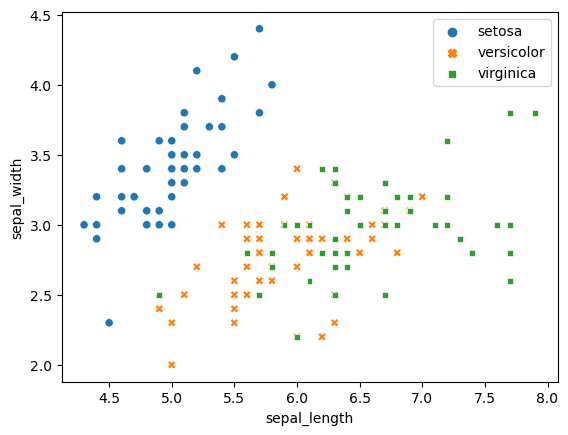

In [8]:
data = sns.load_dataset("iris")

ax = sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", style="species", data=data)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

In [4]:
p = ["q", "d"]
p.append("a")
p

['q', 'd', 'a']

In [5]:
test = {}
test["test"] = {}
test["test"]["test"] = {}



In [1]:
def generate_paths(json_data, current_path="", paths=None):
    if paths is None:
        paths = []

    if isinstance(json_data, dict):
        for key, value in json_data.items():
            new_path = f"{current_path}/{key}" if current_path else key
            
            if isinstance(value, (dict, list)):
                generate_paths(value, new_path, paths)
            else:
                paths.append(f"{new_path} = {value}")

    elif isinstance(json_data, list):
        for index, item in enumerate(json_data):
            if isinstance(item, dict) and 'id' in item:
                new_path = f"{current_path}{item['id'].split(':')[1]}"
                generate_paths(item, new_path, paths)
            else:
                new_path = f"{current_path}/{index}"
                generate_paths(item, new_path, paths)

    return paths

# Example usage
example_json = {
    "test": 5,
    "images": [
        {"image": {"id": "image:0"}},
        {"image": {"id": "image:1"}}
    ],
    "nested": {
        "key": "value",
        "list": [1, 2, 3]
    }
}

result = generate_paths(example_json)
for path in result:
    print(path)

test = 5
images/0/image/id = image:0
images/1/image/id = image:1
nested/key = value


In [2]:
def generate_paths(json_data, current_path="", paths=None):
    if paths is None:
        paths = []

    if isinstance(json_data, dict):
        for key, value in json_data.items():
            new_path = f"{current_path}/{key}" if current_path else key
            
            if isinstance(value, (dict, list)):
                generate_paths(value, new_path, paths)
            else:
                paths.append(f"{new_path} = {value}")

    elif isinstance(json_data, list):
        for index, item in enumerate(json_data):
            if isinstance(item, dict) and 'id' in item:
                new_path = f"{current_path}/{item['id'].split(':')[1]}"
                generate_paths(item, new_path, paths)
            else:
                new_path = f"{current_path}/{index}"
                if isinstance(item, (dict, list)):
                    generate_paths(item, new_path, paths)
                else:
                    paths.append(f"{new_path} = {item}")

    return paths

# Example usage
example_json = {
    "test": 5,
    "images": [
        {"image": {"id": "image:0"}},
        {"image": {"id": "image:1"}}
    ],
    "nested": {
        "key": "value",
        "list": [1, 2, 3]
    }
}

result = generate_paths(example_json)
for path in result:
    print(path)

test = 5
images/0/image/id = image:0
images/1/image/id = image:1
nested/key = value
nested/list/0 = 1
nested/list/1 = 2
nested/list/2 = 3


In [18]:
from ome_types import OME
from ome_types._autogenerated.ome_2016_06 import StructuredAnnotations, XMLAnnotation

xml_annot = XMLAnnotation(value="test")
struct_annot = StructuredAnnotations(xml_annotations=[xml_annot])
ome = OME(structured_annotations=struct_annot)


In [19]:
ome

OME(structured_annotations={'xml_annotations': [{'id': 'Annotation:13', 'value': {'any_elements': ['test']}, 'kind': 'xmlannotation'}]})

In [20]:
ome.structured_annotations = StructuredAnnotations()

In [27]:
d = ("a", "b")

a, b = d

print(a, b)

a b


In [2]:
from metagpt import utils



In [27]:
OME().imag

OME()

In [52]:
import json
import jsonpatch
from ome_types import  to_dict
from ome_types.model import OME
from typing import Any, Dict, Union

def ensure_path_exists(data: Dict[str, Any], path: str) -> None:
    """
    Ensure that the path exists in the data structure, creating empty lists or dicts as needed.
    """
    parts = path.strip("/").split("/")
    current = data
    for i, part in enumerate(parts):
        if part == "-" or part.isdigit():
            if not isinstance(current, list):
                current = []
            if part == "-" or int(part) == len(current):
                current.append({})
            elif int(part) > len(current):
                current.extend([{} for _ in range(int(part) - len(current) + 1)])
            current = current[int(part) if part != "-" else -1]
        else:
            if part not in current:
                if i < len(parts) - 1 and (parts[i+1] == "-" or parts[i+1].isdigit()):
                    current[part] = []
                else:
                    current[part] = {}
            current = current[part]

def custom_apply(patch: jsonpatch.JsonPatch, data: Dict[str, Any]) -> Dict[str, Any]:
    """
    Apply the JSON Patch, automatically creating missing nodes.
    """
    for operation in patch:
        if operation["op"] in ["add", "replace"]:
            ensure_path_exists(data, "/".join(operation["path"].split("/")[:-1]))
        elif operation["op"] == "remove":
            ensure_path_exists(data, operation["path"])
    return patch.apply(data)

def update_state(current_state: OME, proposed_change: list) -> OME:
    """
    Update the OME state based on proposed changes using JSONPatch, automatically creating missing nodes.

    Args:
        current_state (OME): The current OME state.
        proposed_change (list): The change proposed as a JSON Patch document.

    Returns:
        OME: The updated OME state.

    Raises:
        jsonpatch.JsonPatchException: If the patch is invalid or cannot be applied.
        ValueError: If the resulting document is not a valid OME model.
    """
    # Convert current state to a dictionary, ensuring all default empty lists are included
    current_dict = json.loads(current_state.model_dump_json())

    try:
        # Apply the JSON Patch with custom logic to create missing nodes
        patch = jsonpatch.JsonPatch(proposed_change)
        updated_dict = custom_apply(patch, current_dict)

        # Convert the updated dictionary back to an OME object
        updated_state = from_dict(updated_dict)

        return updated_state

    except jsonpatch.JsonPatchException as e:
        raise ValueError(f"Invalid JSON Patch: {str(e)}")
    except Exception as e:
        raise ValueError(f"Error applying patch or converting to OME: {str(e)}")

# Example usage
if __name__ == "__main__":
    # Create an empty OME object
    initial_state = OME()

    # Define a JSON Patch to add a new image with a channel
patch1 = [
        {
            "op": "add",
            "path": "/images/0/pixels",
            "value": {
                    "id": "Pixels:0",
                    "type": "uint16",
                    "dimension_order": "XYZCT",
                    "size_x": 1024,
                    "size_y": 1024,
                    "size_z": 1,
                    "size_c": 3,
                    "size_t": 1,
                    "channels": [
                        {
                            "id": "Channel:0",
                            "name": "Red",
                            "color": -16776961
                        }
                    ]

            }
        }
    ]

try:
    updated_state = update_state(initial_state, patch1)
    print("Updated OME object:")
    print(to_dict(updated_state))
except ValueError as e:
    print(f"Error: {str(e)}")

Updated OME object:
{'images': [{'pixels': {'channels': [{'id': 'Channel:0', 'name': 'Red', 'color': Color('red', rgb=(255, 0, 0))}], 'id': 'Pixels:0', 'dimension_order': <Pixels_DimensionOrder.XYZCT: 'XYZCT'>, 'type': <PixelType.UINT16: 'uint16'>, 'size_x': 1024, 'size_y': 1024, 'size_z': 1, 'size_c': 3, 'size_t': 1}, 'id': 'Image:4'}]}


In [57]:
patch = [{'op': 'add',
         'path': '/images/-',
         'value': {
             'id': 'Image:0',
             'name': 'testetst_Image8_edited_.ome.tif',
             'pixels': {'id': 'Pixels:0',
                        'dimension_order': 'XYCZT',
                        'size_x': 680,
                        'size_y': 280,
                        'size_z': 1,
                        'size_c': 3,
                        'size_t': 30,
                        'type': 'uint8',
                        'physical_size_x': 0.09922878199885109,
                        'physical_size_x_unit': 'µm', 
                        'physical_size_y': 0.09922878199885109,
                        'physical_size_y_unit': 'µm',
                        'channels': [{'id': 'Channel:0:0', 'samples_per_pixel': 1},
                                     {'id': 'Channel:0:1', 'samples_per_pixel': 1},
                                     {'id': 'Channel:0:2', 'samples_per_pixel': 1}
                                     ]
                                     }
                                     }
                                     }]

In [58]:
update_state(OME(), patch)

OME(images=[<1 field_type>])

In [54]:
pixels_patch_data = [
  {
    "op": "add",
    "path": "/images/-",
    "value": {
      "id": "Image:0",
      "name": "New Image",
      "acquisition_date": "2024-07-21T12:00:00",
      "pixels": {
        "id": "Pixels:0",
        "type": "uint16",
        "dimension_order": "XYZCT",
        "size_x": 1024,
        "size_y": 1024,
        "size_z": 1,
        "size_c": 3,
        "size_t": 1,
        "physical_size_x": 0.1,
        "physical_size_x_unit": "µm",
        "physical_size_y": 0.1,
        "physical_size_y_unit": "µm",
        "physical_size_z": 1.0,
        "physical_size_z_unit": "µm",
        "channels": [
          {
            "id": "Channel:0",
            "name": "Red",
            "color": -16776961
          },
          {
            "id": "Channel:1",
            "name": "Green",
            "color": 16711935
          },
          {
            "id": "Channel:2",
            "name": "Blue",
            "color": 65535
          }
        ]
      }
    }
  }
]


ValueError: Invalid JSON Patch: Document is expected to be sequence of operations, got a sequence of strings.

In [39]:
test = OME()
to_dict(test) # returns {}
test.model_dump_json() # returns '{"rights":null,"projects":[],"datasets":[],"folders":[],"experiments":[],"plates":[],"screens":[],"experimenters":[],"experimenter_groups":[],"instruments":[],"images":[],"structured_annotations":{"xml_annotations":[],"file_annotations":[],"list_annotations":[],"long_annotations":[],"double_annotations":[],"comment_annotations":[],"boolean_annotations":[],"timestamp_annotations":[],"tag_annotations":[],"term_annotations":[],"map_annotations":[]},"rois":[],"binary_only":null,"uuid":null,"creator":null}'


{}

In [38]:
test = OME()
test.model_dump_json()


'{"rights":null,"projects":[],"datasets":[],"folders":[],"experiments":[],"plates":[],"screens":[],"experimenters":[],"experimenter_groups":[],"instruments":[],"images":[],"structured_annotations":{"xml_annotations":[],"file_annotations":[],"list_annotations":[],"long_annotations":[],"double_annotations":[],"comment_annotations":[],"boolean_annotations":[],"timestamp_annotations":[],"tag_annotations":[],"term_annotations":[],"map_annotations":[]},"rois":[],"binary_only":null,"uuid":null,"creator":null}'

In [40]:
import json
import jsonpatch
from ome_types import to_dict
from metagpt.utils.utils import from_dict
from ome_types.model import OME

def update_state(current_state: OME, proposed_change: dict) -> OME:
    """
    Update the OME state based on proposed changes using JSONPatch.

    Args:
        current_state (OME): The current OME state.
        proposed_change (dict): The change proposed as a JSON Patch document.

    Returns:
        OME: The updated OME state.

    Raises:
        jsonpatch.JsonPatchException: If the patch is invalid or cannot be applied.
        ValueError: If the resulting document is not a valid OME model.
    """
    # Convert current state to a dictionary
    current_dict = json.loads(current_state.model_dump_json())

    try:
        # Apply the JSON Patch
        patch = jsonpatch.JsonPatch(proposed_change)
        updated_dict = patch.apply(current_dict)

        # Convert the updated dictionary back to an OME object
        updated_state = from_dict(updated_dict)

        return updated_state

    except jsonpatch.JsonPatchException as e:
        raise ValueError(f"Invalid JSON Patch: {str(e)}")
    except Exception as e:
        raise ValueError(f"Error applying patch or converting to OME: {str(e)}")
    return updated_state

In [10]:
def test()-> jsonpatch.JsonPatch:
    return jsonpatch.JsonPatch([
        {"op": "add", "path": "/structured_annotations/xml_annotations/-", "value": {"value": "test"}}
    ])

In [ ]:
Image

In [ ]:
from json_patch_model import JsonPatch

pixels_patch_data = [
  {
    "op": "add",
    "path": "/images/0/pixels",
    "value": {
      "id": "Pixels:0",
      "type": "uint16",
      "dimension_order": "XYZCT",
      "size_x": 1024,
      "size_y": 1024,
      "size_z": 1,
      "size_c": 3,
      "size_t": 1,
      "physical_size_x": 0.1,
      "physical_size_x_unit": "µm",
      "physical_size_y": 0.1,
      "physical_size_y_unit": "µm",
      "physical_size_z": 1.0,
      "physical_size_z_unit": "µm",
      "channels": [
        {
          "id": "Channel:0",
          "name": "Red",
          "color": -16776961
        },
        {
          "id": "Channel:1",
          "name": "Green",
          "color": 16711935
        },
        {
          "id": "Channel:2",
          "name": "Blue",
          "color": 65535
        }
      ]
    }
  }
]

try:
    json_patch = JsonPatch(root=pixels_patch_data)
    print("Valid JSON Patch for adding Pixels property")
    print(json_patch.model_dump_json(indent=2))
except ValueError as e:
    print(f"Invalid JSON Patch: {e}")

In [4]:
import json
from ome_types import to_dict
from ome_types.model import OME
from ome_types._autogenerated.ome_2016_06 import Image, Pixels
from metagpt.utils.utils import from_dict


# Import the update_state function from your module
#from your_module import update_state

def print_state(state: OME):
    print(to_dict(state))

# Create an initial OME state
pixel = Pixels(size_x=1024,
               size_y=768,
               dimension_order="XYZCT",
               size_t=1,
               size_c=1,
               size_z=1, 
               type="uint8",
               channels=[{"id": "Channel:0", "name": "Red"},
                         {"id": "Channel:1", "name": "Red2"},
                         {"id": "Channel:3", "name": "Red3"}])

image = Image(name="Test Image", pixels=pixel)
initial_state = OME(images=[image])

print("Initial State:")
print(to_dict(initial_state))

# Test 1: Replace operation
patch1 = [
    {"op": "replace", "path": "/images/0/name", "value": "Updated Image Name"}
]
updated_state1 = update_state(initial_state, patch1)
print("\nAfter Replace Operation:")
print(to_dict(updated_state1))

# Test 2: Add operation
patch2 = [
    {"op": "add", "path": "/images/0/description", "value": "A new description"}
]
updated_state2 = update_state(updated_state1, patch2)
print("\nAfter Add Operation:")
print_state(updated_state2)

# Test 3: Remove operation
patch3 = [
    {"op": "remove", "path": "/images/0/pixels/channels/2"}
]
updated_state3 = update_state(updated_state2, patch3)
print("\nAfter Remove Operation:")
print_state(updated_state3)

# Test 4: Multiple operations in one patch
patch4 = [
    {"op": "replace", "path": "/images/0/pixels/size_x", "value": 2048},
    {"op": "replace", "path": "/images/0/pixels/size_y", "value": 1536},
    {"op": "add", "path": "/images/0/pixels/channels/-", "value": {"id": "Channel:3", "name": "Alpha"}}
]
updated_state4 = update_state(updated_state3, patch4)
print("\nAfter Multiple Operations:")
print_state(updated_state4)

# Test 5: Move operation
patch5 = [
    {"op": "move", "from": "/images/0/pixels/channels/0", "path": "/images/0/pixels/channels/-"}
]
updated_state5 = update_state(updated_state4, patch5)
print("\nAfter Move Operation:")
print_state(updated_state5)

# Test 6: Copy operation
patch6 = [
    {"op": "copy", "from": "/images/0/pixels/channels/0", "path": "/images/0/pixels/channels/-"}
]
updated_state6 = update_state(updated_state5, patch6)
print("\nAfter Copy Operation:")
print_state(updated_state6)

# Test 7: Test operation (this doesn't modify the state, but verifies a condition)
patch7 = [
    {"op": "test", "path": "/images/0/name", "value": "Updated Image Name"}
]
try:
    update_state(updated_state6, patch7)
    print("\nTest Operation Passed")
except ValueError as e:
    print(f"\nTest Operation Failed: {str(e)}")

Initial State:
{'images': [{'pixels': {'channels': [{'id': 'Channel:0', 'name': 'Red'}, {'id': 'Channel:1', 'name': 'Red2'}, {'id': 'Channel:3', 'name': 'Red3'}], 'id': 'Pixels:2', 'dimension_order': <Pixels_DimensionOrder.XYZCT: 'XYZCT'>, 'type': <PixelType.UINT8: 'uint8'>, 'size_x': 1024, 'size_y': 768, 'size_z': 1, 'size_c': 1, 'size_t': 1}, 'id': 'Image:2', 'name': 'Test Image'}]}

After Replace Operation:
{'images': [{'pixels': {'channels': [{'id': 'Channel:0', 'name': 'Red'}, {'id': 'Channel:1', 'name': 'Red2'}, {'id': 'Channel:3', 'name': 'Red3'}], 'id': 'Pixels:2', 'dimension_order': <Pixels_DimensionOrder.XYZCT: 'XYZCT'>, 'type': <PixelType.UINT8: 'uint8'>, 'size_x': 1024, 'size_y': 768, 'size_z': 1, 'size_c': 1, 'size_t': 1}, 'id': 'Image:2', 'name': 'Updated Image Name'}]}

After Add Operation:
{'images': [{'description': 'A new description', 'pixels': {'channels': [{'id': 'Channel:0', 'name': 'Red'}, {'id': 'Channel:1', 'name': 'Red2'}, {'id': 'Channel:3', 'name': 'Red3'}],

In [4]:
from ome_types import OME

test = OME()
test_model = test.model_dump_json()

In [76]:
from pygram import tree

def json_to_pygram(json_data: dict):
    """
    Convert a JSON structure to a pygram tree.
    """
    def convert_element(key, value):
        node = tree.Node(key)
        
        if isinstance(value, dict):
            for k, v in value.items():
                node.addkid(convert_element(k, v))
        elif isinstance(value, list):
            for i, item in enumerate(value):
                node.addkid(convert_element(f"{key}_{i}", item))
        else:
            node.addkid(tree.Node(str(value)))
        
        return node

    # Assuming the input is a dictionary with a single root element
    root_key, root_value = next(iter(json_data.items()))
    return convert_element(root_key, root_value)

In [71]:
from pygram import tree

def json_to_pygram(element: dict):
    """
    Convert a JSON element to a pygram tree.
    """
    # Use the first key of the dictionary as the node label
    element_key = next(iter(element))

    node = tree.Node(element_key)
    
    # Get the value associated with the key
    print(element_key)
    element_value = element[element_key]
    print(type(element_value))

    # If the value is a list or dict, process its children
    if isinstance(element_value, (dict)):
        node.addkid(json_to_pygram(element_value))
    if isinstance(element_value, (list)):
        for child in element_value:
            if isinstance(child, dict):
                node.addkid(json_to_pygram(child))
            else:
                node.addkid(tree.Node(str(child)))
    else:
        node.addkid(tree.Node(str(element_value)))
    return node

In [57]:
for k, v in my_dict.items():
    print(k, v)

ome {'images': [{'pixels': {'channels': [{'id': 'Channel:0', 'name': 'Red', 'color': Color('red', rgb=(255, 0, 0))}, {'id': 'Channel:1', 'name': 'Green', 'color': Color('lime', rgb=(0, 255, 0))}, {'id': 'Channel:2', 'name': 'Blue', 'color': Color('blue', rgb=(0, 0, 255))}], 'id': 'Pixels:0', 'dimension_order': <Pixels_DimensionOrder.XYZCT: 'XYZCT'>, 'type': <PixelType.UINT16: 'uint16'>, 'size_x': 1024, 'size_y': 1024, 'size_z': 1, 'size_c': 3, 'size_t': 1, 'physical_size_x': 0.1, 'physical_size_y': 0.1, 'physical_size_z': 1.0}, 'id': 'Image:1'}]}


In [66]:
test = {'images': [{'pixels': {'channels': [{'id': 'Channel:0', 'name': 'Red', 'color': Color('red', rgb=(255, 0, 0))}, {'id': 'Channel:1', 'name': 'Green', 'color': Color('lime', rgb=(0, 255, 0))}, {'id': 'Channel:2', 'name': 'Blue', 'color': Color('blue', rgb=(0, 0, 255))}], 'id': 'Pixels:0', 'dimension_order': <Pixels_DimensionOrder.XYZCT: 'XYZCT'>, 'type': <PixelType.UINT16: 'uint16'>, 'size_x': 1024, 'size_y': 1024, 'size_z': 1, 'size_c': 3, 'size_t': 1, 'physical_size_x': 0.1, 'physical_size_y': 0.1, 'physical_size_z': 1.0}, 'id': 'Image:1'}]}
test

SyntaxError: invalid syntax (1565195110.py, line 1)

[<pygram.tree.Node at 0x74aed2cfbfa0>, <pygram.tree.Node at 0x74aed2cfbac0>]

In [77]:
my_pygran = json_to_pygram({"ome": to_dict(test)})

In [32]:
my_dict = {"ome": to_dict(test)} 

In [31]:

from ome_types import to_dict



{'ome': {'images': [{'pixels': {'channels': [{'id': 'Channel:0',
       'name': 'Red',
       'color': Color('red', rgb=(255, 0, 0))},
      {'id': 'Channel:1',
       'name': 'Green',
       'color': Color('lime', rgb=(0, 255, 0))},
      {'id': 'Channel:2',
       'name': 'Blue',
       'color': Color('blue', rgb=(0, 0, 255))}],
     'id': 'Pixels:0',
     'dimension_order': <Pixels_DimensionOrder.XYZCT: 'XYZCT'>,
     'type': <PixelType.UINT16: 'uint16'>,
     'size_x': 1024,
     'size_y': 1024,
     'size_z': 1,
     'size_c': 3,
     'size_t': 1,
     'physical_size_x': 0.1,
     'physical_size_y': 0.1,
     'physical_size_z': 1.0},
    'id': 'Image:1'}]}}

In [27]:
from metagpt.utils.utils import update_state
test = OME()
test = update_state(test, pixels_patch_data)

In [24]:
from pydantic import BaseModel, Field, RootModel
from typing import List, Literal, Any, Union

class AddReplaceTestOperation(BaseModel):
    op: Literal["add", "replace", "test"]
    path: str = Field(..., description="A JSON Pointer path.")
    value: Any = Field(..., description="The value to add, replace or test.")

class RemoveOperation(BaseModel):
    op: Literal["remove"]
    path: str = Field(..., description="A JSON Pointer path.")

class MoveCopyOperation(BaseModel):
    op: Literal["move", "copy"]
    path: str = Field(..., description="A JSON Pointer path.")
    from_: str = Field(..., alias="from", description="A JSON Pointer path pointing to the location to move/copy from.")

class JsonPatch(BaseModel):
    root: List[Union[AddReplaceTestOperation, RemoveOperation, MoveCopyOperation]]

    class Config:
        title = "JSON schema for JSONPatch files"
        json_schema_extra = {
            "$schema": "http://json-schema.org/draft-04/schema#",
            "id": "https://json.schemastore.org/json-patch.json",
        }

# Example usage
patch_data = [
    {"op": "replace", "path": "/images/0/name", "value": "New Image Name"},
    {"op": "add", "path": "/images/0/description", "value": "A new description"},
    {"op": "remove", "path": "/images/0/pixels/channels/2"},
    {"op": "move", "from": "/images/0/pixels/channels/0", "path": "/images/0/pixels/channels/-"}
]

pixels_patch_data = [
  {
    "op": "add",
    "path": "/images/0/pixels",
    "value": {
      "id": "Pixels:0",
      "type": "uint16",
      "dimension_order": "XYZCT",
      "size_x": 1024,
      "size_y": 1024,
      "size_z": 1,
      "size_c": 3,
      "size_t": 1,
      "physical_size_x": 0.1,
      "physical_size_x_unit": "µm",
      "physical_size_y": 0.1,
      "physical_size_y_unit": "µm",
      "physical_size_z": 1.0,
      "physical_size_z_unit": "µm",
      "channels": [
        {
          "id": "Channel:0",
          "name": "Red",
          "color": -16776961
        },
        {
          "id": "Channel:1",
          "name": "Green",
          "color": 16711935
        },
        {
          "id": "Channel:2",
          "name": "Blue",
          "color": 65535
        }
      ]
    }
  }
]

try:
    json_patch = JsonPatch(root=pixels_patch_data)
    print("Valid JSON Patch")
    print(json_patch.model_dump_json(indent=2))
except ValueError as e:
    print(f"Invalid JSON Patch: {e}")

Valid JSON Patch
{
  "root": [
    {
      "op": "add",
      "path": "/images/0/pixels",
      "value": {
        "id": "Pixels:0",
        "type": "uint16",
        "dimension_order": "XYZCT",
        "size_x": 1024,
        "size_y": 1024,
        "size_z": 1,
        "size_c": 3,
        "size_t": 1,
        "physical_size_x": 0.1,
        "physical_size_x_unit": "µm",
        "physical_size_y": 0.1,
        "physical_size_y_unit": "µm",
        "physical_size_z": 1.0,
        "physical_size_z_unit": "µm",
        "channels": [
          {
            "id": "Channel:0",
            "name": "Red",
            "color": -16776961
          },
          {
            "id": "Channel:1",
            "name": "Green",
            "color": 16711935
          },
          {
            "id": "Channel:2",
            "name": "Blue",
            "color": 65535
          }
        ]
      }
    }
  ]
}


In [61]:
from metagpt.utils.utils import merge_xml_annotation

annot = {'annotations':
         {'Image': 
            [{'Resolution': 
            {'XResolution': '100777.212', 'YResolution': '100777.212', 'ResolutionUnit': 'Centimeter'},
            'Dimensions':
            {'ImageWidth': '680', 'ImageLength': '280'},
            'PhotometricInterpretation': 'BlackIsZero',
            'PlanarConfiguration': 'Chunky',
            'Compression': 'Uncompressed',
            'BitsPerSample': '8',
            'SamplesPerPixel': '1',
            'SampleFormat': 'unsigned integer'}],
            'MetaData': {'PhotometricInterpretation': 'Monochrome',
                         'Software': 'OME Bio-Formats 6.7.0',
                         'MetaMorph': 'no', 'ImageJ': ''},
            'Hyperstack': {'hyperstack': 'true'},
            'Series': {'getSizeX': '680',
                       'getSizeY': '280',
                       'getSizeZ': '1',
                       'getSizeC': '3',
                       'getSizeT': '30',
                       'getPixelType': '1',
                       'getImageCount': '90',
                       'getDimensionOrder': 'XYCZT',
                       'isRGB': 'False',
                       'isInterleaved': 'False',
                       'isLittleEndian': 'True',
                       'isIndexed': 'False',
                       'getSeriesCount': '1'}
                       
                       }
                       }

merge_xml_annotation(annot)

Merging structured annotations
No OME XML provided as strarting point for merge
Merged structured annotations


'<OME xmlns="http://www.openmicroscopy.org/Schemas/OME/2016-06" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.openmicroscopy.org/Schemas/OME/2016-06 http://www.openmicroscopy.org/Schemas/OME/2016-06/ome.xsd">\n  <StructuredAnnotations>\n    <XMLAnnotation ID="Annotation:2">\n      <Value>\n        <OriginalMetadata>\n          <Key>Image</Key>\n          <Value>[{\'Resolution\': {\'XResolution\': \'100777.212\', \'YResolution\': \'100777.212\', \'ResolutionUnit\': \'Centimeter\'}, \'Dimensions\': {\'ImageWidth\': \'680\', \'ImageLength\': \'280\'}, \'PhotometricInterpretation\': \'BlackIsZero\', \'PlanarConfiguration\': \'Chunky\', \'Compression\': \'Uncompressed\', \'BitsPerSample\': \'8\', \'SamplesPerPixel\': \'1\', \'SampleFormat\': \'unsigned integer\'}]</Value>\n        </OriginalMetadata>\n        <OriginalMetadata>\n          <Key>MetaData</Key>\n          <Value/>\n          <OriginalMetadata>\n            <OriginalMetadata>\n            